## Домашнее задание №7
### В финальном домашнем задании необходимо ответить на вопрос, какой же алгоритм все таки лучше решает ту или иную задачу. А именно, нужно рассмотреть одну из следующих задач:

* CartPole
* Pendulum
* LunarLender с дискретным пространством действий (по умолчанию)
* LunarLender с непрерывным пространством действий (нужно положить continuous=True, см. пояснения здесь Lunar Lander)
* BipedalWalker

В качестве среды для испытаний была выбрана CartPole, соответственно реализован алгоритм SAC для дискретных сред, а остальные взяты с предыдущих заданий.

Импорт необходимых библиотек.

In [1]:
import pandas as pd
import gym
import matplotlib.pyplot as plt
import numpy as np
from CrossEntropy import CrossEntropy
from DeepCrossEntropy import DeepCrossEntropy
from DQN_STN import DQN_STN
from PPO_continuous import PPO_continuous
from PPO_discrete import PPO_discrete
from SAC_continuous import SAC_continuous
from SAC_discrete import SAC_discrete

Применение алгоритмов в цикле по 3 итерации для получения и усреднения наград.

In [2]:
mean_rewards_sac = []
for _ in range(3):
    sac = SAC_discrete(env=gym.make('CartPole'), max_len_trajectory=500, n_episode=1000, n_neurons=64, gamma=0.99,
                        batch_size=250, alpha=0.1, tau=0.002, q_lr=0.0005, pi_lr=0.0005, is_print=False, len_deque=20000)
    sac.fit()
    mean_rewards_sac.append(sac.mean_total_rewards)

/home/iukash/development/python/gym/gym_env/lib/python3.10/site-packages/gym/envs/registration.py:576: UserWarning: WARN: Using the latest versioned environment `CartPole-v1` instead of the unversioned environment `CartPole`.
  logger.warn(
/home/iukash/development/python/gym/gym_env/lib/python3.10/site-packages/gym/envs/registration.py:576: UserWarning: WARN: Using the latest versioned environment `CartPole-v1` instead of the unversioned environment `CartPole`.
  logger.warn(


In [3]:
mean_rewards_ppo = []
for _ in range(3):
    ppo = PPO_discrete(env=gym.make('CartPole'), max_len_trajectory=500, n_episode=4000, n_trajectory=5, n_neurons=64, gamma=0.99, 
                       batch_size=250, epoch_n=30, pi_lr=0.0005, v_lr=0.0005, is_print=False, eps_decay=0.99)
    ppo.fit()
    mean_rewards_ppo.append(ppo.mean_total_rewards)

In [4]:
mean_rewards_dqn = []
for _ in range(3):
    dqn = DQN_STN(env=gym.make('CartPole'), lr=0.0005, n_episode=1000, n_neurons=64, gamma=0.99, batch_size=250,
                  eps_end=0.01, eps_decay=0.995, tau=0.002, is_print=False)
    dqn.fit()
    mean_rewards_dqn.append(dqn.mean_total_rewards)

In [5]:
mean_rewards_dce = []
for _ in range(3):
    dce = DeepCrossEntropy(env=gym.make('CartPole'), q=0.8, n_trajectories=10, n_episode=2000, n_neurons=64,
                           eps_end=0.01, eps_decay=0.995, lr=0.0005, is_print=False)
    dce.fit()
    mean_rewards_dce.append(dce.mean_total_rewards)

Преобразование наград для алгоритмов ppo deep-cross-entropy поскольку они для одной итерации обучения используют несколько траекторий.

In [6]:
mean_rewards_ppo_5 = []
for i in mean_rewards_ppo:
    mean_reward_i = []
    for reward in i:
        for _ in range(5):
            mean_reward_i.append(reward)
    mean_rewards_ppo_5.append(mean_reward_i)

In [7]:
mean_rewards_dce_10 = []
for i in mean_rewards_dce:
    mean_reward_i = []
    for reward in i:
        for _ in range(10):
            mean_reward_i.append(reward)
    mean_rewards_dce_10.append(mean_reward_i)

Усреднение наград нескольких итераций запуска каждого алгоритма

In [8]:
rewards_sac = np.mean(mean_rewards_sac, axis=0)
rewards_ppo = np.mean(mean_rewards_ppo_5, axis=0)
rewards_dqn = np.mean(mean_rewards_dqn, axis=0)
rewards_dce = np.mean(mean_rewards_dce_10, axis=0)

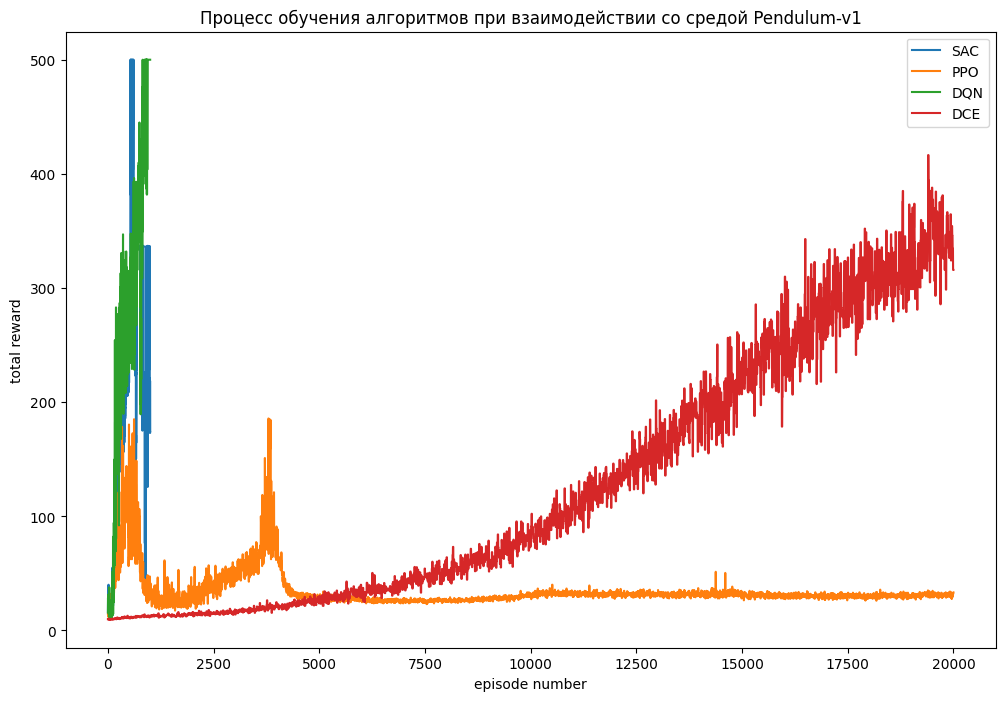

In [9]:
plt.figure(figsize = (12, 8))
plt.plot(rewards_sac, label='SAC')
plt.plot(rewards_ppo, label='PPO')
plt.plot(rewards_dqn, label='DQN')
plt.plot(rewards_dce, label='DCE')
plt.title('Процесс обучения алгоритмов при взаимодействии со средой Pendulum-v1')
plt.xlabel('episode number')
plt.ylabel('total reward')
plt.legend()
plt.show()

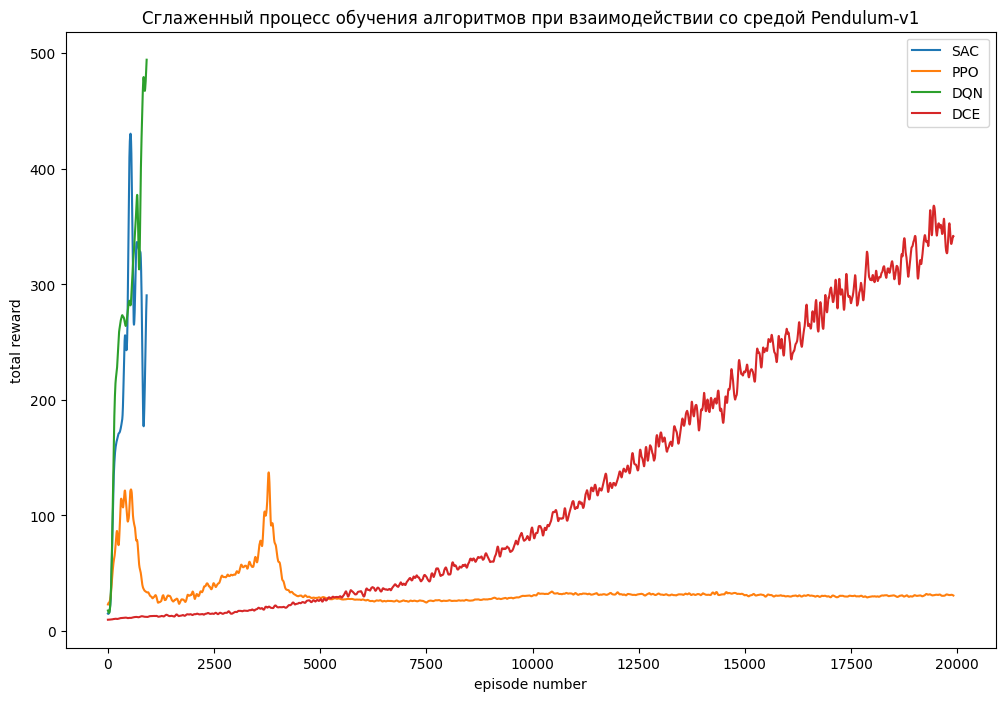

In [12]:
n = 50
rewards_sac = pd.Series(rewards_sac).rolling(window=n).mean().iloc[n-1:].values
rewards_ppo = pd.Series(rewards_ppo).rolling(window=n).mean().iloc[n-1:].values
rewards_dqn = pd.Series(rewards_dqn).rolling(window=n).mean().iloc[n-1:].values
rewards_dce = pd.Series(rewards_dce).rolling(window=n).mean().iloc[n-1:].values

plt.figure(figsize = (12, 8))
plt.plot(rewards_sac, label='SAC')
plt.plot(rewards_ppo, label='PPO')
plt.plot(rewards_dqn, label='DQN')
plt.plot(rewards_dce, label='DCE')
plt.title('Сглаженный процесс обучения алгоритмов при взаимодействии со средой Pendulum-v1')
plt.xlabel('episode number')
plt.ylabel('total reward')
plt.legend()
plt.show()

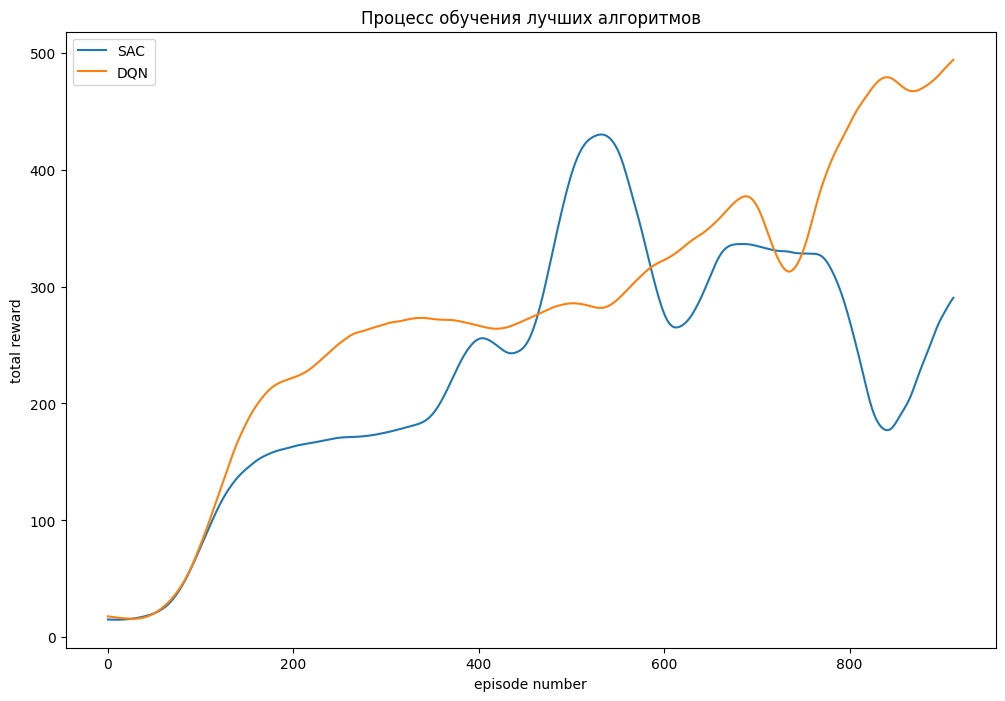

In [14]:
plt.figure(figsize = (12, 8))
plt.plot(rewards_sac, label='SAC')
plt.plot(rewards_dqn, label='DQN')
plt.title('Процесс обучения лучших алгоритмов')
plt.xlabel('episode number')
plt.ylabel('total reward')
plt.legend()
plt.show()

### Выводы домашнему заданию:
Алгоритмы по скорости сходимости и качеству в рамках решения данной среды распределились следующим образом:
1) Алгоритмы Soft Actor Critic и DQN soft target network - показали приемлемый уровень качества (хотя видимо в  итерациях закрались не лучшие инициализации) и быструю скорость сходимости.
2) Алгоритм Deep Cross Entropy - за 20к траекторий так и не успел сойтись, медленный алгоритм, но достаточно точно двигался к решению задачи.
3) Алгоритм Proximal Policy Optimization - получился самым нестабильным, на пробных запускал на тех же гиперпараметрах получал сходимость, однако на финальном этапе оценки не смог сойтись, необходимо погружаться занаво и пробовать улучшения.


## P.S.
Спасибо Вам огромное за курс! Буду стараться применить полученные знания на практике!